In [1]:
# Define ticket
ticket = 'AAPL'

# Use a new working directory for relative imports
from sys import path
import os

os.chdir(os.path.dirname(path[0]))
# print("New Working Directory " , os.getcwd())

In [2]:
from day_trading.files import DayTradingFiles
from day_trading.dataset import DayTradingDataset
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import pandas as pd
import os

# Prepare the models, targets, and features
files = DayTradingFiles()
dataset = DayTradingDataset()

(
    features_train_df, target_high_train, target_low_train,
    features_test_df, target_high_test, target_low_test
) = dataset.test_train_split(ticket, 'long')


high_model = LogisticRegression()
low_model = LogisticRegression()

# Train the models
high_model.fit(features_train_df, target_high_train)
low_model.fit(features_train_df, target_low_train)

num_train_samples = features_train_df.shape[0]
num_test_samples = features_test_df.shape[0]
print(f'Training distribution High: 0 ({(num_train_samples - sum(target_high_train))*100/num_train_samples:0.2f}%) - 1 ({sum(target_high_train)*100/num_train_samples:0.2f}%)')
print(f'Validation distribution High: 0 ({(num_test_samples - sum(target_high_test))*100/num_test_samples:0.2f}%) - 1 ({sum(target_high_test)*100/num_test_samples:0.2f}%)')
print(f'Training distribution Low: 0 ({(num_train_samples - sum(target_low_train))*100/num_train_samples:0.2f}%) - 1 ({sum(target_low_train)*100/num_train_samples:0.2f}%)')
print(f'Validation distribution Low: 0 ({(num_test_samples - sum(target_low_test))*100/num_test_samples:0.2f}%) - 1 ({sum(target_low_test)*100/num_test_samples:0.2f}%)')

print(features_test_df.head(10))

Getting the data for the ticket
Getting data for AAPL
Convert the HTTP response into a pandas DataFrame
Processing data for AAPL
Processing data for AAPL
Processing data for AAPL
There are 6995 data points.
Calculating the cummulative features.
Defining the targets.
# Samples with NaN: 6995
# Samples without NaN: 6989
Two weeks ago: 2022-11-03 18:34:36.451917
Defining the training data.
Defining the test data.
Training distribution High: 0 (79.01%) - 1 (20.99%)
Validation distribution High: 0 (69.19%) - 1 (30.81%)
Training distribution Low: 0 (21.42%) - 1 (78.58%)
Validation distribution Low: 0 (29.11%) - 1 (70.89%)
            high         low       close        open  volume  day_of_week  \
6226  140.029999  139.755005  139.830002  139.919998  634199            3   
6227  140.009995  139.750000  139.794998  139.839996  782946            3   
6228  140.100006  139.759995  140.020096  139.789993  616009            3   
6229  140.089996  139.919998  140.009995  140.009995  451049        

In [3]:
import numpy as np


# Feature importance
sorted_idx = np.argsort(high_model.coef_)[::-1][0]
print(f'Feature Importance for high regressor:')
for index in sorted_idx:
    print([features_train_df.columns[index], high_model.coef_[0][index]])

print('--------------------------------------')
sorted_idx = np.argsort(low_model.coef_)[::-1][0]
print(f'Feature Importance for low regressor:')
for index in sorted_idx:
    print([features_train_df.columns[index], low_model.coef_[0][index]])

"""
sorted_idx = np.argsort(high_model.feature_importances_)[::-1]
print(f'Feature Importance for high regressor:')
for index in sorted_idx:
    print([features_test_df.columns[index], high_model.feature_importances_[index]])

print('--------------------------------------')
sorted_idx = np.argsort(low_model.feature_importances_)[::-1]
print(f'Feature Importance for low regressor:')
for index in sorted_idx:
    print([features_test_df.columns[index], low_model.feature_importances_[index]])
"""

Feature Importance for high regressor:
['MovingAvg_high_3', -0.0016228650402083085]
['EMA_high_3', -0.001622807689643793]
['high', -0.001622526922521744]
['open', -0.0016219131941325286]
['close', -0.0016218685343376393]
['MovingAvg_low_3', -0.0016210076896678704]
['EMA_low_3', -0.001621007597600478]
['low', -0.0016210032104494168]
['RSI', -0.0005120435891974763]
['minute', -0.00024708336231701297]
['hour', -0.00017217859526643824]
['day_of_week', -1.9677706786119477e-05]
['Volatility_low_3', -5.653125018933269e-07]
['Volatility_high_3', -3.759347079881913e-07]
['VWAP', -1.9711987831746873e-09]
['Return_low_3', 6.849608436900105e-10]
['Return_high_3', 4.922119186522857e-09]
['MACD_Histogram', 1.1602200669694225e-08]
['MACD_Signal', 3.258628437568485e-08]
['MACD', 4.418848504537902e-08]
['volume', 6.976706856166278e-07]
--------------------------------------
Feature Importance for low regressor:
['volume', -6.390263871014452e-07]
['MACD', -2.4939860448951814e-07]
['MACD_Histogram', -1.6

"\nsorted_idx = np.argsort(high_model.feature_importances_)[::-1]\nprint(f'Feature Importance for high regressor:')\nfor index in sorted_idx:\n    print([features_test_df.columns[index], high_model.feature_importances_[index]])\n\nprint('--------------------------------------')\nsorted_idx = np.argsort(low_model.feature_importances_)[::-1]\nprint(f'Feature Importance for low regressor:')\nfor index in sorted_idx:\n    print([features_test_df.columns[index], low_model.feature_importances_[index]])\n"

In [4]:
# Make predictions
high_predictions = high_model.predict(features_test_df)
low_predictions = low_model.predict(features_test_df)

print(f'Sample High Predictions: {high_predictions[:20]}')

Sample High Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]


Low Precision: 0.7219973009446694
Low Recall: 0.9852670349907919
Low Accuracy: 0.720626631853786
Low F1-Score: 0.8333333333333333
Low Confusion Matrix:

----------------------------------
High Precision: 0.48148148148148145
High Recall: 0.05508474576271186
High Accuracy: 0.6906005221932114
High F1-Score: 0.09885931558935361
High Confusion Matrix:



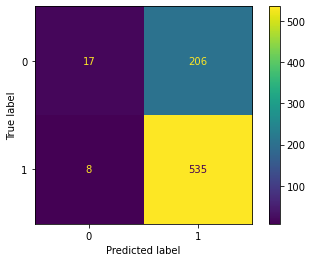

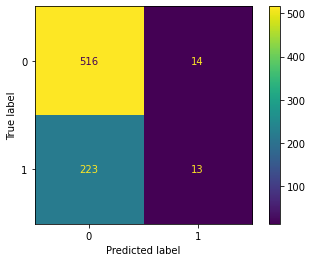

In [5]:
from sklearn.metrics import (
    precision_score, recall_score, accuracy_score,
    confusion_matrix, f1_score, ConfusionMatrixDisplay
)

print(f'Low Precision: {precision_score(target_low_test, low_predictions)}')
print(f'Low Recall: {recall_score(target_low_test, low_predictions)}')
print(f'Low Accuracy: {accuracy_score(target_low_test, low_predictions)}')
print(f'Low F1-Score: {f1_score(target_low_test, low_predictions)}')
print(f'Low Confusion Matrix:\n')
cm_display = ConfusionMatrixDisplay(confusion_matrix(target_low_test, low_predictions)).plot()

print('----------------------------------')
print(f'High Precision: {precision_score(target_high_test, high_predictions)}')
print(f'High Recall: {recall_score(target_high_test, high_predictions)}')
print(f'High Accuracy: {accuracy_score(target_high_test, high_predictions)}')
print(f'High F1-Score: {f1_score(target_high_test, high_predictions)}')
print(f'High Confusion Matrix:\n')
cm_display = ConfusionMatrixDisplay(confusion_matrix(target_high_test, high_predictions)).plot()